Hello!✌

In this file I would like to introduce the phase problem, which highlights the significance of phase information when the Fourier Transform (FT) is used.
***
At first, let's install necessary libraries

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from functools import wraps

I utilised some drawing functions which had been written before, but don't worry – it contains all necessary kwargs. If you want, you may change it.

In [11]:
def validate(*arg_positions):
    """Error checking"""
    def decorator(f):
        @wraps(f)
        def wrapper(*args, **kwargs):
            for pos in arg_positions:
                if pos < len(args) and not isinstance(args[pos], np.ndarray):
                    raise ValueError(f"{pos} must be numpy")
            return f(*args, **kwargs)
        return wrapper
    return decorator

def plot_image(data, ax=None, **kwargs):
    """
    Basic function for image drawing.

    Parameters:
        data: np.ndarray
        ax: matplotlib axis (if None, new axis is created)

    """
    if ax is None:
        ax = plt.gca()

    imshow_kwargs = {
        'cmap': kwargs.get('cmap', 'grey'),
        'aspect': kwargs.get('aspect', 'auto'),
        'origin': kwargs.get('origin', 'lower')
    }

    if data.ndim == 3 and data.shape[2] == 3:
        imshow_kwargs.pop('cmap', None)

    img = ax.imshow(data, **imshow_kwargs)
    ax.set_title(kwargs.get('title', ''))

    if kwargs.get('colorbar', True):
        plt.colorbar(img, ax=ax)

    return ax

@validate(0)
def show_1_image(data, **kwargs):
    """Plots 1 image using kwargs"""
    plt.figure(figsize=kwargs.get('figsize', (6, 6)))
    plot_image(data, **kwargs)
    plt.tight_layout()
    plt.show()

@validate(0, 1)
def show_2_images(data1, data2, **kwargs):
    """Plots 2 images using kwargs"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=kwargs.get('figsize', (6, 12)))

    plot_image(data1, ax=ax1,
              title=kwargs.get('title1', 'Module'),
              cmap=kwargs.get('cmap1', 'grey'),
              **kwargs)

    plot_image(data2, ax=ax2,
              title=kwargs.get('title2', 'Phase'),
              cmap=kwargs.get('cmap2', 'grey'),
              **kwargs)

    if 'suptitle' in kwargs:
        fig.suptitle(kwargs['suptitle'])

    plt.tight_layout()
    plt.show()

Upload your images here

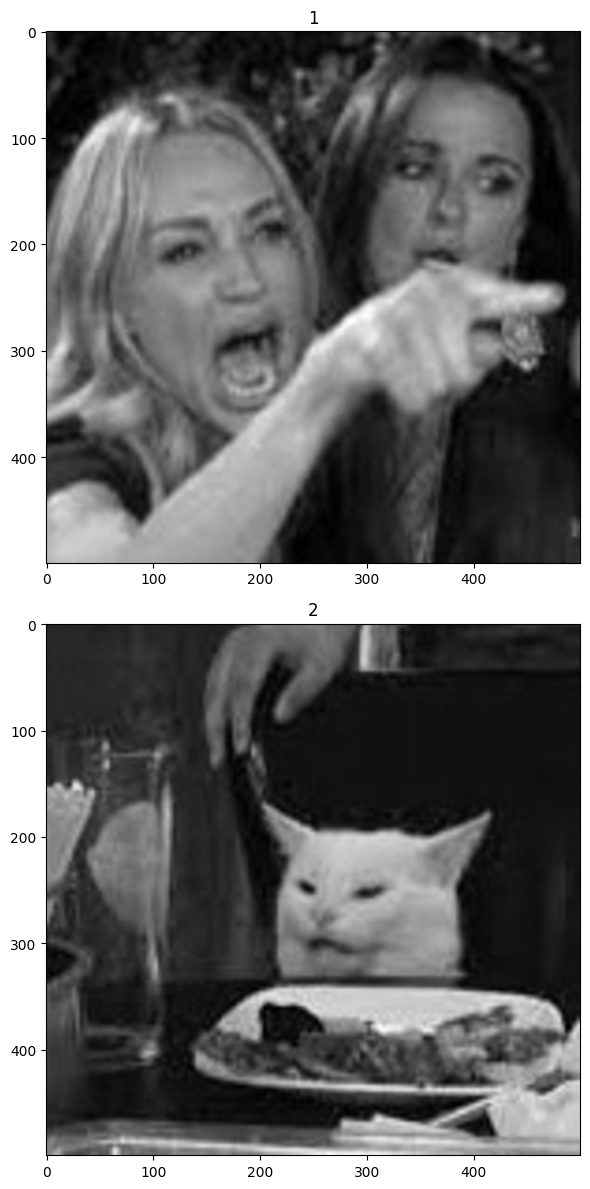

In [13]:
PATH=["women.jpg","cat.jpg"]
IM=[Image.open(path).convert('L') for path in PATH]
init_arrays=[im.resize((500,500)) for im in IM]
init_arrays=[arr/np.max(arr) for arr in init_arrays]
show_2_images(init_arrays[0],init_arrays[1],origin='upper',title1='1',title2='2',colorbar=False)

Fourier transform. In order to see the magnitude, I presented it in log scale

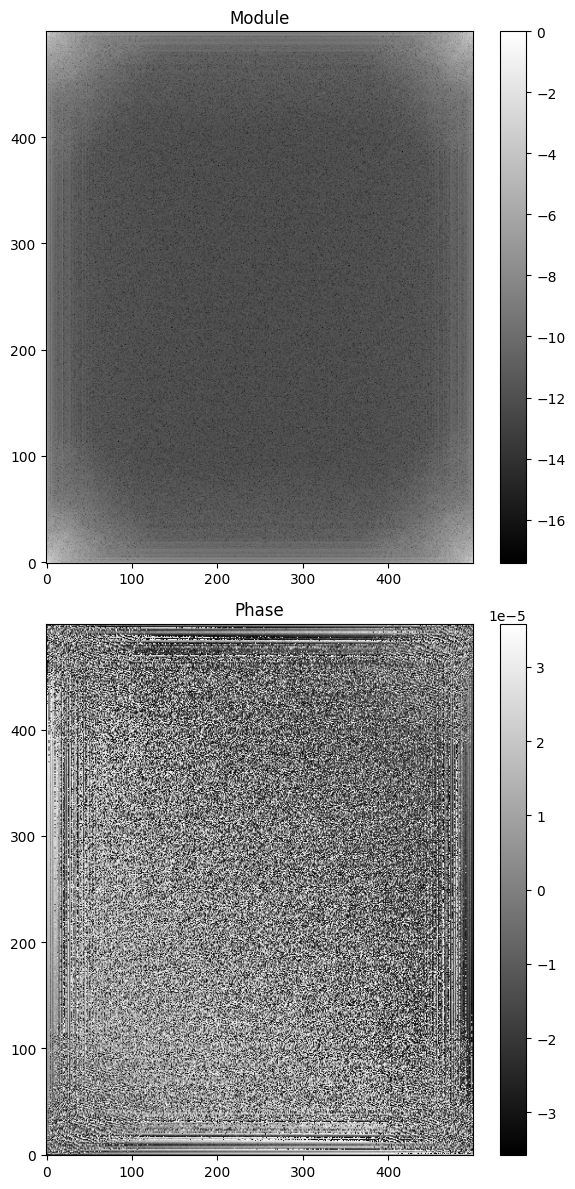

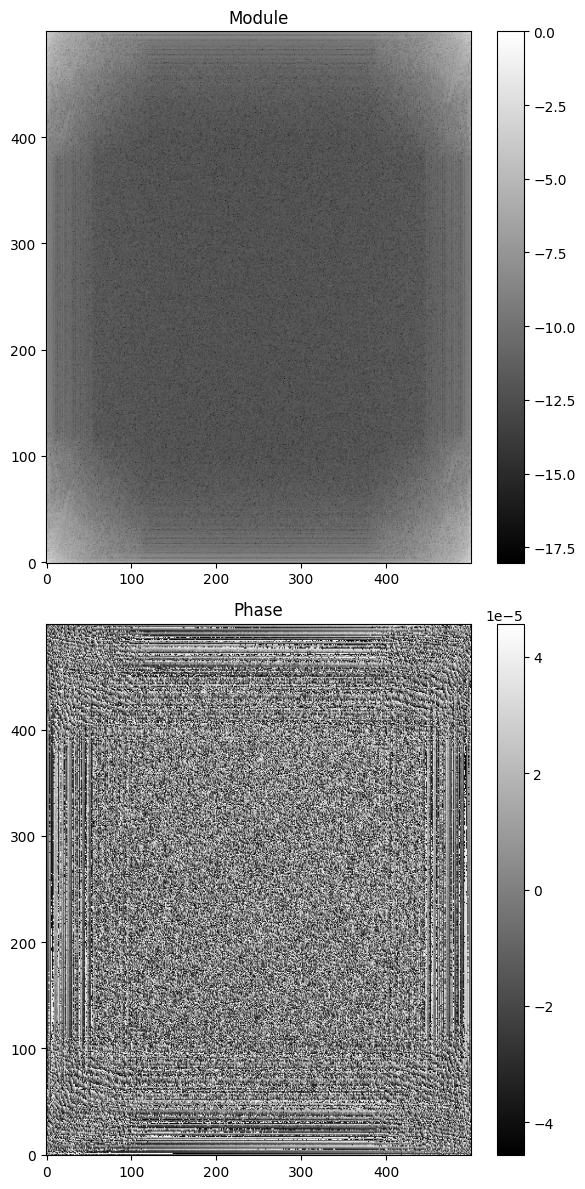

In [14]:
FFT_arrays=[np.fft.fft2(arr) for arr in init_arrays]
for FFT_array in FFT_arrays:
  show_2_images(np.log(np.abs(FFT_array)/np.max(np.abs(FFT_array))),np.angle(FFT_array)/np.max(np.abs(FFT_array)))

⭐Magic happens here!⭐

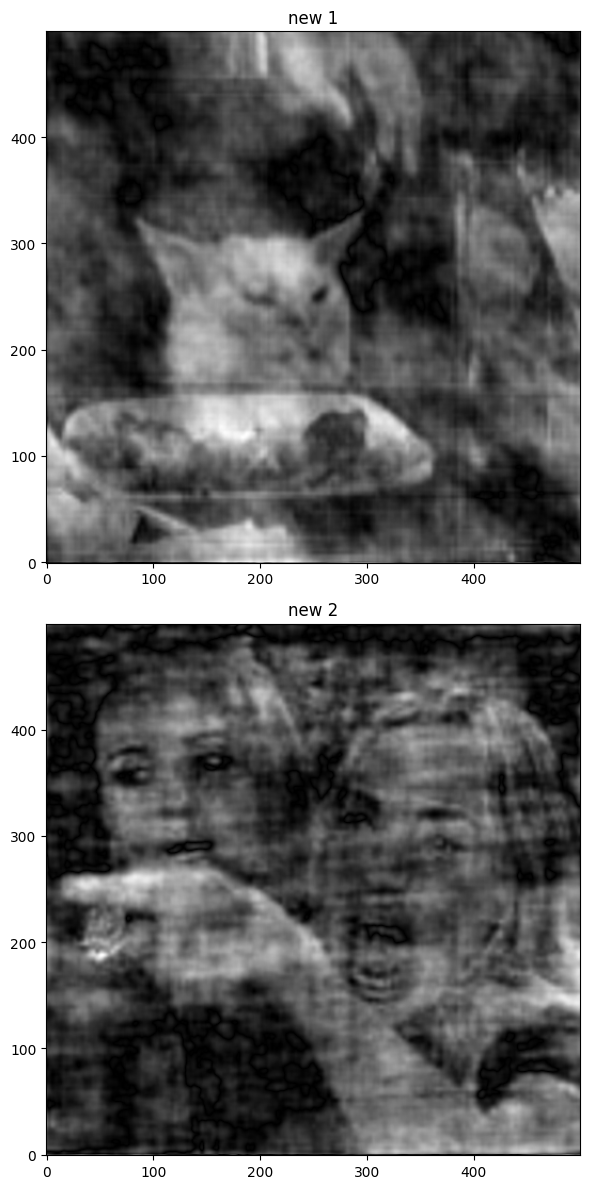

In [15]:
New_1F=np.abs(FFT_arrays[0])*np.exp(-1j*np.angle(FFT_arrays[1]))
New_1=np.fft.ifft2(New_1F)
New_2F=np.abs(FFT_arrays[1])*np.exp(-1j*np.angle(FFT_arrays[0]))
New_2=np.fft.ifft2(New_2F)
show_2_images(np.abs(New_1),np.abs(New_2),colorbar=False,title1='new 1',title2='new 2')